<a href="https://colab.research.google.com/github/ivancleycarneiro/Python/blob/main/Projeto_An%C3%A1lise_Unic%C3%B3rnios_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python para análise de dados

# Análises das empresas unicónios

##Sobre o conjunto de dados
"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$1 bilhão de dólares. o termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre o seu candidato ideal e quem eles podem contratardo grupo de pessoas disponíveis.

Os dados utilizados nesse trabalho são referentes a julho de 2022 e foram baixados do site Kaggle através do seguinte endereço: 
[Base de dados](https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups?select=Unicorns+in+June+2022s+end+-+june+2022.csv)
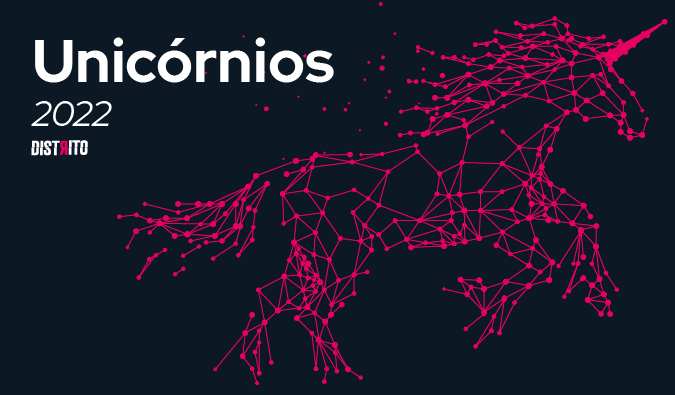





In [ ]:
# Primeiro passo importar as bibliotes utilizadas na análise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# biblioteca warnings com a função ignore, vai ignorar os avisos que apareceriam durante o processo
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Segundo passo é obter os dados para análise, que já foram baixadas e upadas para o jupyter notebook.
Base_Dados = pd.read_csv('/Unicorns in June 2022s end - june 2022.csv')

# vamos verificar a Dimensão desses dados, quantas linhas e colunas tem na tabela

Base_Dados.shape




(1170, 7)

In [ ]:
#Para conhecer os primeiros registros, é só utilizar o comando .head(), vai apresentar os cinco primeiros elementos da tabela.
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$45.60,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."


In [ ]:
# Para verificar todas as colunas existentes na tabela, podemos usar o comando .columns
Base_Dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [ ]:
# Podemos renomear as colunas de acordo com a nossa preferência, nesse caso vou mudar o idioma para português, utilizando a função .rename().
Base_Dados.rename(columns = {
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'País',
    'City' : 'Cidade',
    'Industry' :'Setor',
    'Investors' : 'Investidores'
        }, inplace=True)

In [ ]:
# É muito importante verificar o tipo dos dados para não ter problemas de incompatibilidade mais frente no código.
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1170 non-null   object
 1   Valor ($)       1170 non-null   object
 2   Data de Adesão  1170 non-null   object
 3   País            1170 non-null   object
 4   City            1170 non-null   object
 5   Setor           1170 non-null   object
 6   Investidores    1152 non-null   object
dtypes: object(7)
memory usage: 64.1+ KB


In [ ]:
# Para verificar se tem campos nulos dentro da tabela vamos utilizar a função .isnull() e depois o .sum() para somar e agrupar em uma unica apresentação.
Base_Dados.isnull().sum()

Empresa            0
Valor ($)          0
Data de Adesão     0
País               0
City               0
Setor              0
Investidores      18
dtype: int64

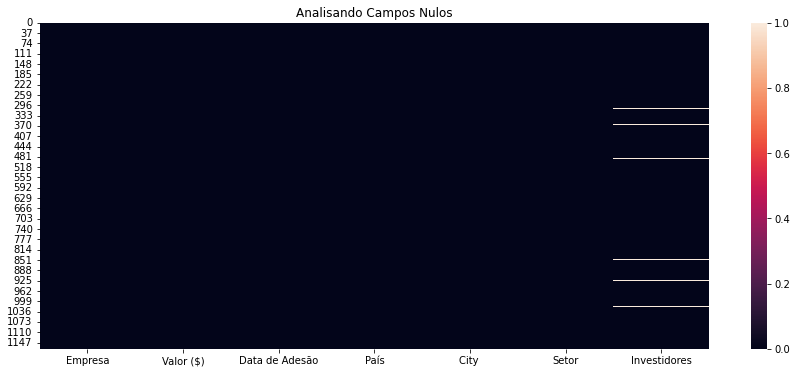

In [ ]:
#Para fazer a mesma representação de forma gráfica utiliza o seaborn mapa de calor. sns.heatmap.
plt.figure(figsize=(15,6)) # tamanho da gráfico
plt.title('Analisando Campos Nulos') #título do gráfico
sns.heatmap( Base_Dados.isnull());

In [ ]:
# Vamos analisar quantos campos únicos temos em nossa base de dados, para isso vamos usar a função .nunique()
Base_Dados.nunique()

Empresa           1167
Valor ($)          219
Data de Adesão     683
País                48
City               282
Setor               33
Investidores      1136
dtype: int64

In [ ]:
# Se quisermos conhecer os valores únicos, utilizamos a funcão .unique, é só colocar entre a coluna da tabela que se deseja obter o resultado.
Base_Dados['Setor'].unique() 

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Partners, DST 

In [ ]:
# Se quisermos apresentar os valores únicos em um ranking, utilizamos a faunção .value_counts()
Base_Dados['Setor'].value_counts()

Fintech                                                               236
Internet software & services                                          221
E-commerce & direct-to-consumer                                       105
Health                                                                 90
Artificial intelligence                                                74
Other                                                                  65
Supply chain, logistics, & delivery                                    62
Cybersecurity                                                          58
Data management & analytics                                            44
Auto & transportation                                                  39
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 31
Consumer & retail                     

In [ ]:
# Para apresentar o mesmo ranking com o percentual de cada setor, utilizamos o normalize = True dentro da função .values_counts.
Base_Dados['Setor'].value_counts(normalize=True)

Fintech                                                               0.201709
Internet software & services                                          0.188889
E-commerce & direct-to-consumer                                       0.089744
Health                                                                0.076923
Artificial intelligence                                               0.063248
Other                                                                 0.055556
Supply chain, logistics, & delivery                                   0.052991
Cybersecurity                                                         0.049573
Data management & analytics                                           0.037607
Auto & transportation                                                 0.033333
Hardware                                                              0.032479
Mobile & telecommunications                                           0.031624
Edtech                                              

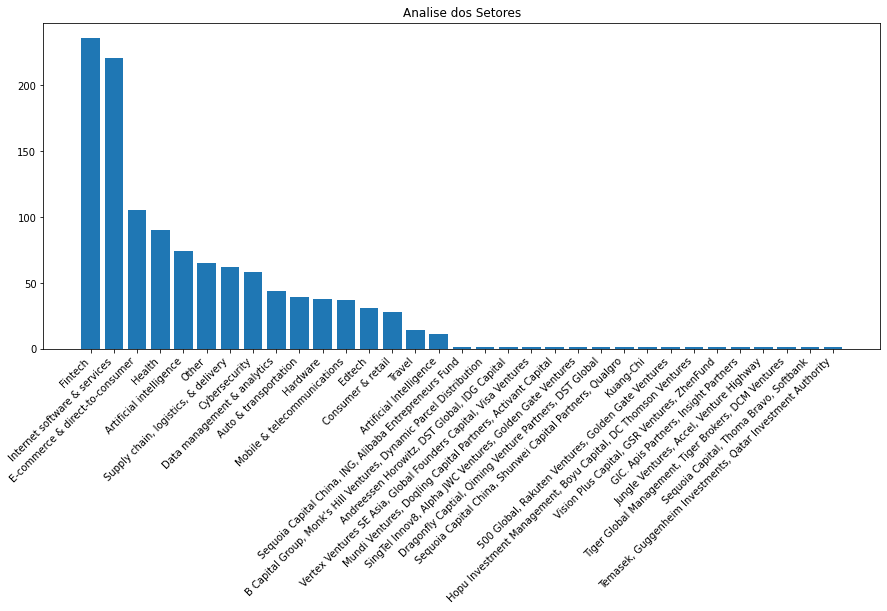

In [ ]:
# Agora se quisermos colocar esses dados em um gráfico de barras, vamos utilizar o plt.bar
plt.figure(figsize= (15,6)) # mesmo tamanho da figura apresentada anteriormente
plt.title('Analise dos Setores') # Titulo do gráfico
plt.bar( Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts())
plt.xticks( rotation=45, ha='right'); # Ajusta os nomes dos setores no gráfico de forma que fique melhor a visualização.

In [ ]:
# Vamos agora analizar os dados por país. 
Base_Dados['País'].value_counts()

United States           628
China                   174
India                    68
United Kingdom           44
Germany                  29
France                   25
Israel                   21
Canada                   19
Brazil                   17
South Korea              15
Singapore                13
Australia                 8
Sweden                    8
Hong Kong                 7
Mexico                    7
Netherlands               7
Japan                     6
Ireland                   6
Switzerland               6
Indonesia                 6
Norway                    5
Spain                     4
Finland                   4
Belgium                   3
Turkey                    3
United Arab Emirates      3
Colombia                  3
Denmark                   2
South Africa              2
Croatia                   2
Philippines               2
Chile                     2
Thailand                  2
Estonia                   2
Austria                   2
Lithuania           

In [ ]:
# Vamos normalizar os dados para saber a porcentagem de cada país e depois multiplicar por 100, e deixar com uma casa após a vírgula.
round(Base_Dados['País'].value_counts(normalize=True)*100,1)

United States           53.7
China                   14.9
India                    5.8
United Kingdom           3.8
Germany                  2.5
France                   2.1
Israel                   1.8
Canada                   1.6
Brazil                   1.5
South Korea              1.3
Singapore                1.1
Australia                0.7
Sweden                   0.7
Hong Kong                0.6
Mexico                   0.6
Netherlands              0.6
Japan                    0.5
Ireland                  0.5
Switzerland              0.5
Indonesia                0.5
Norway                   0.4
Spain                    0.3
Finland                  0.3
Belgium                  0.3
Turkey                   0.3
United Arab Emirates     0.3
Colombia                 0.3
Denmark                  0.2
South Africa             0.2
Croatia                  0.2
Philippines              0.2
Chile                    0.2
Thailand                 0.2
Estonia                  0.2
Austria       

In [ ]:
#Vamos salvar em uma variável chamada Analise.

Analise = round(Base_Dados['País'].value_counts(normalize=True)*100,1)

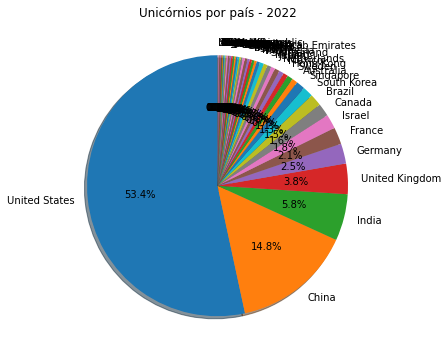

In [ ]:
 # Vamos criar um gráfico de pizza com os dados dos países.
 plt.figure( figsize = (15,6)) #tamanho da figura
 plt.title('Unicórnios por país - 2022') # título do gráfico
 #dentro do plt.pie vão dados dos países.
 plt.pie(
     Analise,
     labels = Analise.index,
     shadow=True,
     startangle=90,
     autopct='%1.1f%%'
);

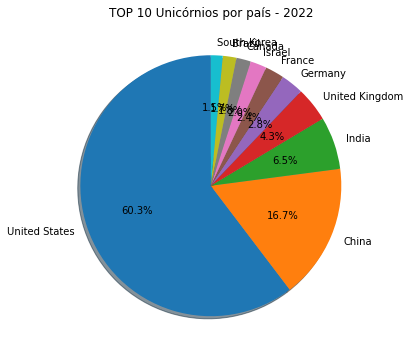

In [ ]:
# Para organizar um pouco mais e melhorar a vizualização, vamos fazer um top 10 maiores países. Utilizaremos o mesmo código acima, adicionaremos o .head(10) no Analise e definiremos do índice 0 até 10.
plt.figure( figsize = (15,6)) #tamanho da figura
plt.title('TOP 10 Unicórnios por país - 2022') # título do gráfico
#dentro do plt.pie vão dados dos países.
plt.pie(
     Analise.head(10),
     labels = Analise.index[0:10],
     shadow=True,
     startangle=90,
     autopct='%1.1f%%');



In [ ]:
# Ranking dos países em uma lista. Para alterar é só mudar o número dentro do parâmentro head
Analise.head(10)

United States     53.7
China             14.9
India              5.8
United Kingdom     3.8
Germany            2.5
France             2.1
Israel             1.8
Canada             1.6
Brazil             1.5
South Korea        1.3
Name: País, dtype: float64

In [ ]:
# Para fazer análise com datas, é preciso mudar o tipo da coluna "Data de Adesão" para o tipo data com a função data.time.
Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])

In [ ]:
# Aprensenta a coluna já alterada para o formato date.time
Base_Dados['Data de Adesão']

0      2017-04-07
1      2012-12-01
2      2018-07-03
3      2014-01-23
4      2011-12-12
          ...    
1165   2022-06-08
1166   2022-06-08
1167   2022-06-02
1168   2022-06-21
1169   2022-06-21
Name: Data de Adesão, Length: 1170, dtype: datetime64[ns]

In [ ]:
# Para extrair o Ano e Mês
Base_Dados['Mês'] = pd.DatetimeIndex( Base_Dados['Data de Adesão'] ).month #cria uma coluna nova com os dados do Mês
Base_Dados['Ano'] = pd.DatetimeIndex( Base_Dados['Data de Adesão'] ).year #cria uma coluna nova com os dados do Ano

Base_Dados.head()

,Empresa,Valor ($),Data de Adesão,País,City,Setor,Investidores,Mês,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Klarna,$45.60,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011


In [ ]:
# Tabela Analitica 
Agrupada = Base_Dados.groupby( by=['País', 'Ano', 'Mês', 'Empresa'] ).count()
Agrupada

Valor ($)  Data de Adesão  \
País          Ano  Mês Empresa                                            
Argentina     2021 8   Uala                           1               1   
Australia     2018 1   Canva                          1               1   
              2019 3   Airwallex                      1               1   
              2021 5   SafetyCulture                  1               1   
                   7   Culture Amp                    1               1   
...                                                 ...             ...   
United States 2022 6   Turntide Technologies          1               1   
                       Vanta                          1               1   
                       airSlate                       1               1   
Vietnam       2021 10  Sky Mavis                      1               1   
                   12  MoMo                           1               1   

                                              City   Setor  Investidores  
País          Ano  Mês Empresa                                            
Argentina     2021 8   Uala                       1      1             1  
Australia     2018 1   Canva                      1      1             1  
              2019 3   Airwallex                  1      1             1  
              2021 5   SafetyCulture              1      1             1  
                   7   Culture Amp                1      1             1  
...                                             ...    ...           ...  
United States 2022 6   Turntide Technologies      1      1             1  
                       Vanta                      1      1             1  
                       airSlate                   1      1             1  
Vietnam       2021 10  Sky Mavis                  1      1             1  
                   12  MoMo                       1      1             1  

[1170 rows x 5 columns]

In [ ]:
Base_Dados['Valor ($)'] = pd.to_numeric(Base_Dados['Valor ($)'].apply( lambda linha : linha.replace('$','')))
Base_Dados.head()

,Empresa,Valor ($),Data de Adesão,País,City,Setor,Investidores
0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
